In [ ]:
import pandas as pd
import numpy as np
# Load dataset
file_path = "/content/final_merged_youtube_trending_videos.csv"
df = pd.read_csv(file_path)

# Display basic info
print("🔹 Dataset Info:")
df.info()

# Display first few rows
df.head()


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        767 non-null    object
 1   title           767 non-null    object
 2   description     739 non-null    object
 3   published_at    767 non-null    object
 4   channel_id      767 non-null    object
 5   channel_title   767 non-null    object
 6   category_id     767 non-null    int64 
 7   tags            767 non-null    object
 8   duration        767 non-null    object
 9   definition      767 non-null    object
 10  caption         767 non-null    bool  
 11  view_count      767 non-null    int64 
 12  like_count      767 non-null    int64 
 13  dislike_count   767 non-null    int64 
 14  favorite_count  767 non-null    int64 
 15  comment_count   767 non-null    int64 
 16  category_name   767 non-null    object
 17  comments        767 non-null    object

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,comments,fetch_date
0,UUNCGURWXl0,"Walmik Karad अखेर पुण्यात सरेंडर, कराडसाठी आले...",#MumbaiTakNews #LatestMarathiNews #Maharashtr...,2024-12-31T09:18:41Z,UCQ2W9GCHctD59vQpvLKVg3g,Mumbai Tak,25,"['Santosh Deshmukkh', 'Santosh Deshmukh News t...",PT10M46S,hd,False,1256078,7525,0,0,2401,News & Politics,['पूर्वीच राजकारण कमी आणि समाजकारण जास्ती असाय...,1/1/2025 18:41
1,OgCdsfChAd4,2025 New Year Rasipalan | Astrology | எப்படி இ...,#rasipalan2025 #horoscope #suntv #rasipalan ...,2025-01-01T02:19:18Z,UCYlh4lH762HvHt6mmiecyWQ,Sun News,25,"['sun news', 'sun news live', 'latest news', '...",PT45M28S,hd,False,606992,10141,0,0,556,News & Politics,"['All fellows are donkeyes', '❤❤', 'நீங்க ஐந்த...",1/1/2025 18:41
2,pme2zsax3eU,Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...,Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...,2024-12-31T10:21:24Z,UCpzsmNuUEmod64DGgBDPO-Q,TV5 Kannada,25,[],PT2M16S,hd,False,423330,4715,0,0,185,News & Politics,"['ಮಾಧ್ಯಮದವರು ಇಂತಹ ವಿಚಾರದಲ್ಲಿ ದ್ವನಿ ಎತ್ತಬೇಕು', ...",1/1/2025 18:41
3,h-tH2sCdOnQ,Baakiyalakshmi | 31st December 2024 to 4th Jan...,பாக்கியலட்சுமி - திங்கள் முதல் சனி இரவு 8:30 ம...,2024-12-31T13:30:31Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,24,"['Baakiyalakshmi', 'New Fiction', 'New Serial'...",PT41S,hd,False,2663535,45530,0,0,661,Entertainment,"['Chi kevalama irukku', 'Idhu melayum ava pesa...",1/1/2025 18:41
4,Az38f7cUzK8,School | Aakash Gupta | Stand-up Comedy,India US & UK Tour 2025 Tickets Link : https:/...,2024-12-28T16:04:03Z,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,23,[],PT26M25S,hd,False,4404113,247739,0,0,5145,Comedy,['India US &amp; UK Tour 2025 Tickets Link : <...,1/1/2025 18:41


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Install isodate if not already installed
#!pip install isodate

if 'tag_count' not in df.columns:
    # Example: Assuming tags are in a column called 'tags' and separated by commas
    df['tag_count'] = df['tags'].str.split(',').str.len()
if 'title_length' not in df.columns:
    df['title_length'] = df['title'].str.len()

# Assuming 'view_count' is the target variable
y = df['view_count']  # Assign view_count column to y

# Assuming you have features in columns 'feature1', 'feature2', etc.
# Replace with your actual feature columns
X = df[['like_count', 'duration', 'comment_count', 'tag_count', 'title_length']]

# ----> Convert duration to seconds before converting to float
def duration_to_seconds(duration):
    import isodate  # Import isodate here
    try:
        return isodate.parse_duration(duration).total_seconds()
    except (isodate.isoerror.ISO8601Error, TypeError):  # Handle invalid durations
        return np.nan

X['duration'] = X['duration'].apply(duration_to_seconds)

# ----> Convert X and y to numeric types to avoid the ValueError
X = X.astype(float)
y = y.astype(float)

# Check overdispersion (variance vs mean of view_count)
mean_view_count = np.mean(y)
var_view_count = np.var(y)
overdispersion = var_view_count / mean_view_count

# Fit Negative Binomial Regression
X_const = sm.add_constant(X)  # Add intercept term
nb_model = sm.GLM(y, X_const, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Get model summary
nb_summary = nb_model.summary()

# Check overdispersion ratio and model summary
overdispersion, nb_summary

<ipython-input-14-58e0d3f7df77>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration'] = X['duration'].apply(duration_to_seconds)


(15153591.889882887,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:             view_count   No. Observations:                  767
 Model:                            GLM   Df Residuals:                      761
 Model Family:        NegativeBinomial   Df Model:                            5
 Link Function:                    Log   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -11655.
 Date:                Sat, 01 Mar 2025   Deviance:                       721.01
 Time:                        18:40:55   Pearson chi2:                     794.
 No. Iterations:                   100   Pseudo R-squ. (CS):             0.6821
 Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------

In [ ]:
co

In [ ]:
df_filtered = df
# Create like-to-view ratio and comment-to-view ratio
df_filtered['like_to_view_ratio'] = df_filtered['like_count'] / df_filtered['view_count']
df_filtered['comment_to_view_ratio'] = df_filtered['comment_count'] / df_filtered['view_count']

# Compute correlation matrix
correlation_matrix = df_filtered[['like_to_view_ratio', 'comment_to_view_ratio', 'view_count']].corr()
correlation_matrix


,like_to_view_ratio,comment_to_view_ratio,view_count
like_to_view_ratio,1.000000,0.449302,-0.095922
comment_to_view_ratio,0.449302,1.000000,-0.049237
view_count,-0.095922,-0.049237,1.000000


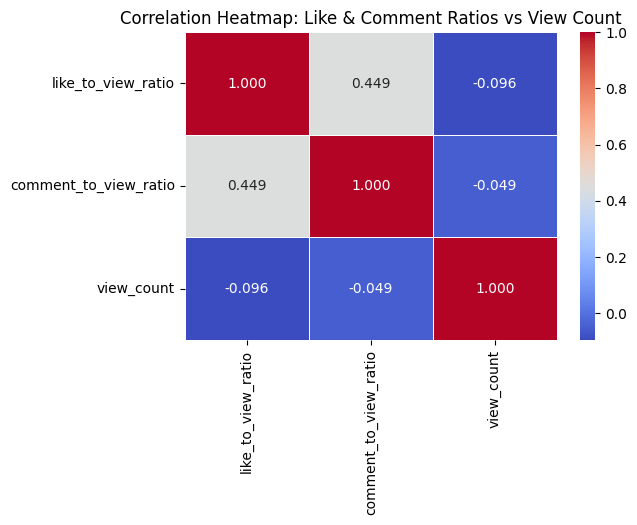

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap: Like & Comment Ratios vs View Count")
plt.show()


In [ ]:
# Add duration to the correlation analysis
df_filtered['duration'] = df_filtered['duration']  # Already converted to seconds

# Compute updated correlation matrix
correlation_matrix_updated = df_filtered[['like_to_view_ratio', 'comment_to_view_ratio', 'view_count', 'duration']].corr()

# Plot updated heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_updated, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap: Engagement Ratios, View Count & Duration")
plt.show()


ValueError: could not convert string to float: 'PT10M46S'

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/final_merged_youtube_trending_videos.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        767 non-null    object
 1   title           767 non-null    object
 2   description     739 non-null    object
 3   published_at    767 non-null    object
 4   channel_id      767 non-null    object
 5   channel_title   767 non-null    object
 6   category_id     767 non-null    int64 
 7   tags            767 non-null    object
 8   duration        767 non-null    object
 9   definition      767 non-null    object
 10  caption         767 non-null    bool  
 11  view_count      767 non-null    int64 
 12  like_count      767 non-null    int64 
 13  dislike_count   767 non-null    int64 
 14  favorite_count  767 non-null    int64 
 15  comment_count   767 non-null    int64 
 16  category_name   767 non-null    object
 17  comments        767 non-null    object
 18  fetch_date

(None,
       video_id                                              title  \
 0  UUNCGURWXl0  Walmik Karad अखेर पुण्यात सरेंडर, कराडसाठी आले...   
 1  OgCdsfChAd4  2025 New Year Rasipalan | Astrology | எப்படி இ...   
 2  pme2zsax3eU  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...   
 3  h-tH2sCdOnQ  Baakiyalakshmi | 31st December 2024 to 4th Jan...   
 4  Az38f7cUzK8            School | Aakash Gupta | Stand-up Comedy   
 
                                          description          published_at  \
 0  #MumbaiTakNews  #LatestMarathiNews #Maharashtr...  2024-12-31T09:18:41Z   
 1  #rasipalan2025 #horoscope #suntv   #rasipalan ...  2025-01-01T02:19:18Z   
 2  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...  2024-12-31T10:21:24Z   
 3  பாக்கியலட்சுமி - திங்கள் முதல் சனி இரவு 8:30 ம...  2024-12-31T13:30:31Z   
 4  India US & UK Tour 2025 Tickets Link : https:/...  2024-12-28T16:04:03Z   
 
                  channel_id     channel_title  category_id  \
 0  UCQ2W9GCHctD59vQpvLKVg3g    

In [ ]:
# Ensure both datetime columns are timezone-naive
df['published_at'] = df['published_at'].dt.tz_localize(None)
df['fetch_date'] = df['fetch_date'].dt.tz_localize(None)

# Recalculate survival time
df['trending_days'] = (df['fetch_date'] - df['published_at']).dt.days

# Define event: 1 if video stopped trending, 0 if still trending at last fetch date
df['event'] = df['trending_days'].apply(lambda x: 1 if x > 0 else 0)

# Display processed data
df[['video_id', 'published_at', 'fetch_date', 'trending_days', 'event']].head()


,video_id,published_at,fetch_date,trending_days,event
0,UUNCGURWXl0,2024-12-31 09:18:41,2025-01-01 18:41:00,1,1
1,OgCdsfChAd4,2025-01-01 02:19:18,2025-01-01 18:41:00,0,0
2,pme2zsax3eU,2024-12-31 10:21:24,2025-01-01 18:41:00,1,1
3,h-tH2sCdOnQ,2024-12-31 13:30:31,2025-01-01 18:41:00,1,1
4,Az38f7cUzK8,2024-12-28 16:04:03,2025-01-01 18:41:00,4,1


In [ ]:
#pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3c3ef66c475f6fe1c925cd4423515f5871267343ff493d599f638f96fe533a29
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


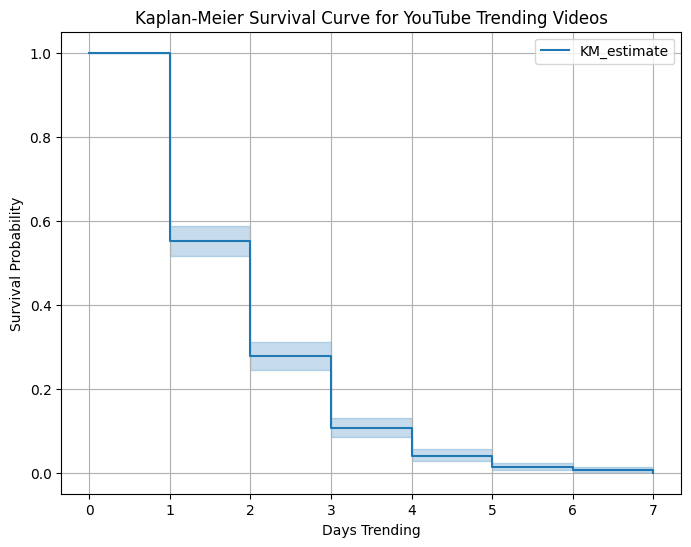

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=df['trending_days'], event_observed=df['event'])

# Plot the survival curve
plt.figure(figsize=(8, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for YouTube Trending Videos')
plt.xlabel('Days Trending')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [ ]:
# Compute survival probabilities manually
survival_table = df.groupby("trending_days")["event"].agg(["count", "sum"]).reset_index()
survival_table.columns = ["Days Trending", "Total Videos", "Videos Stopped Trending"]
survival_table["Survival Probability"] = 1 - (survival_table["Videos Stopped Trending"].cumsum() / survival_table["Total Videos"].sum())

# Display the survival table
survival_table.head(10)


,Days Trending,Total Videos,Videos Stopped Trending,Survival Probability
0,0,56,0,1.000000
1,1,318,318,0.585398
2,2,196,196,0.329857
3,3,122,122,0.170795
4,4,46,46,0.110821
5,5,20,20,0.084746
6,6,5,5,0.078227
7,7,4,4,0.073012


In [ ]:
#pip install isodate

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
import numpy as np
import re



# ✅ Fix 1: Check for missing columns
print("Columns in dataset:", df.columns)

# ✅ Fix 2: Convert `published_at` and `fetch_date` to datetime (force conversion)
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['fetch_date'] = pd.to_datetime(df['fetch_date'], errors='coerce')

# ✅ Fix 3: Drop missing dates BEFORE calculating `trending_days`
df = df.dropna(subset=['published_at', 'fetch_date'])

# ✅ Fix 4: Calculate `trending_days` (only for valid dates)
df['trending_days'] = (df['fetch_date'] - df['published_at']).dt.days

# ✅ Fix 5: Drop rows where `trending_days` is zero or negative
df = df[df['trending_days'] > 0]

# Define event: 1 if video stopped trending, 0 if still trending
df['event'] = 1  # Assuming all videos eventually stop trending

# ✅ Debugging: Check if `trending_days` is created correctly
print(df[['published_at', 'fetch_date', 'trending_days']].head(10))

# Function to convert ISO 8601 duration to seconds
def parse_duration(duration_str):
    if isinstance(duration_str, (int, float)):  # Convert numbers to strings
        duration_str = str(duration_str)
    elif not isinstance(duration_str, str):  # Handle non-string cases
        return None

    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration_str)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        seconds = int(match.group(3)) if match.group(3) else 0
        return hours * 3600 + minutes * 60 + seconds
    return None  # Return None for invalid values

# Convert `duration` to seconds
df['duration'] = df['duration'].astype(str)
df['duration'] = df['duration'].apply(parse_duration)
df = df.dropna(subset=['duration'])

# Select relevant columns
df_cox = df[['trending_days', 'event', 'view_count', 'like_count', 'dislike_count',
             'comment_count', 'favorite_count', 'duration', 'category_name', 'definition', 'caption']].copy()

# Convert categorical variables to numerical (One-Hot Encoding)
df_cox = pd.get_dummies(df_cox, columns=['category_name', 'definition', 'caption'], drop_first=True)

# ✅ Fix 6: Drop columns with only one unique value
df_cox = df_cox.loc[:, df_cox.nunique() > 1]

# ✅ Fix 7: Replace infinite values
df_cox.replace([np.inf, -np.inf], np.nan, inplace=True)

# ✅ Fix 8: Drop missing values
df_cox.dropna(inplace=True)

# ✅ Fix 9: Convert all columns to numeric
df_cox = df_cox.apply(pd.to_numeric, errors='coerce')

# ✅ Fix 10: Drop any remaining NaNs
df_cox.dropna(inplace=True)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='trending_days', event_col='event')

# Display model summary
print(cph.summary)

# Plot hazard ratios (optional)
cph.plot()


Columns in dataset: Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count', 'category_name', 'comments',
       'fetch_date', 'trending_days', 'event'],
      dtype='object')
Empty DataFrame
Columns: [published_at, fetch_date, trending_days]
Index: []


KeyError: 'trending_days'

In [ ]:
# Drop NaNs in date columns
df = df.dropna(subset=['published_at', 'fetch_date'])

# Now create trending_days
df['trending_days'] = (df['fetch_date'] - df['published_at']).dt.days

# Print first few values
print(df[['published_at', 'fetch_date', 'trending_days']].head(10))


Empty DataFrame
Columns: [published_at, fetch_date, trending_days]
Index: []


In [ ]:
print(df[['published_at', 'fetch_date']].head(10))


Empty DataFrame
Columns: [published_at, fetch_date]
Index: []


In [ ]:
print("Before conversion:")
print(df[['published_at', 'fetch_date']].isna().sum())

# Convert to datetime
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['fetch_date'] = pd.to_datetime(df['fetch_date'], errors='coerce')

print("After conversion:")
print(df[['published_at', 'fetch_date']].isna().sum())  # Check again


Before conversion:
published_at    0
fetch_date      0
dtype: int64
After conversion:
published_at    0
fetch_date      0
dtype: int64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/final_merged_youtube_trending_videos.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
df.head()


,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,comments,fetch_date
0,UUNCGURWXl0,"Walmik Karad अखेर पुण्यात सरेंडर, कराडसाठी आले...",#MumbaiTakNews #LatestMarathiNews #Maharashtr...,2024-12-31T09:18:41Z,UCQ2W9GCHctD59vQpvLKVg3g,Mumbai Tak,25,"['Santosh Deshmukkh', 'Santosh Deshmukh News t...",PT10M46S,hd,False,1256078,7525,0,0,2401,News & Politics,['पूर्वीच राजकारण कमी आणि समाजकारण जास्ती असाय...,1/1/2025 18:41
1,OgCdsfChAd4,2025 New Year Rasipalan | Astrology | எப்படி இ...,#rasipalan2025 #horoscope #suntv #rasipalan ...,2025-01-01T02:19:18Z,UCYlh4lH762HvHt6mmiecyWQ,Sun News,25,"['sun news', 'sun news live', 'latest news', '...",PT45M28S,hd,False,606992,10141,0,0,556,News & Politics,"['All fellows are donkeyes', '❤❤', 'நீங்க ஐந்த...",1/1/2025 18:41
2,pme2zsax3eU,Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...,Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...,2024-12-31T10:21:24Z,UCpzsmNuUEmod64DGgBDPO-Q,TV5 Kannada,25,[],PT2M16S,hd,False,423330,4715,0,0,185,News & Politics,"['ಮಾಧ್ಯಮದವರು ಇಂತಹ ವಿಚಾರದಲ್ಲಿ ದ್ವನಿ ಎತ್ತಬೇಕು', ...",1/1/2025 18:41
3,h-tH2sCdOnQ,Baakiyalakshmi | 31st December 2024 to 4th Jan...,பாக்கியலட்சுமி - திங்கள் முதல் சனி இரவு 8:30 ம...,2024-12-31T13:30:31Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,24,"['Baakiyalakshmi', 'New Fiction', 'New Serial'...",PT41S,hd,False,2663535,45530,0,0,661,Entertainment,"['Chi kevalama irukku', 'Idhu melayum ava pesa...",1/1/2025 18:41
4,Az38f7cUzK8,School | Aakash Gupta | Stand-up Comedy,India US & UK Tour 2025 Tickets Link : https:/...,2024-12-28T16:04:03Z,UCAYum5hCyfkSH5T3vSD_kwQ,Aakash Gupta,23,[],PT26M25S,hd,False,4404113,247739,0,0,5145,Comedy,['India US &amp; UK Tour 2025 Tickets Link : <...,1/1/2025 18:41


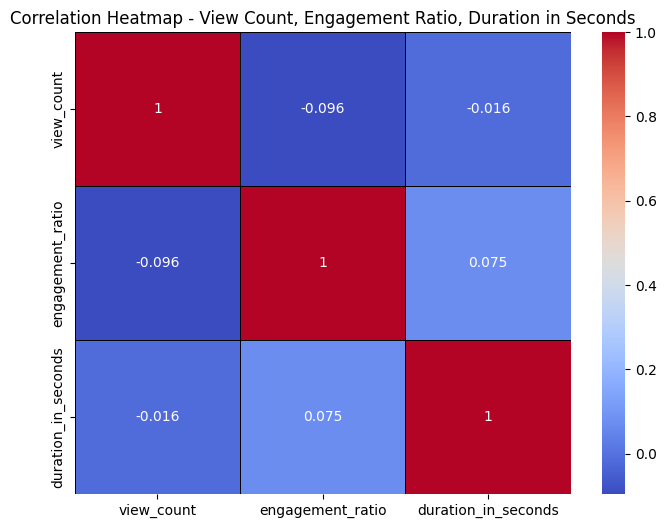

In [2]:
import re

# Function to convert YouTube duration format to seconds
def youtube_duration_to_seconds(duration):
    pattern = r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?'
    match = re.match(pattern, duration)

    if not match:
        return 0

    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0

    return hours * 3600 + minutes * 60 + seconds

# Convert duration to seconds
df['duration_in_seconds'] = df['duration'].apply(youtube_duration_to_seconds)

# Calculate engagement ratio
df['engagement_ratio'] = (df['like_count'] + df['comment_count']) / df['view_count']

# Select relevant columns
df_corr = df[['view_count', 'engagement_ratio', 'duration_in_seconds']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap - View Count, Engagement Ratio, Duration in Seconds")
plt.show()
